# Case study: Hacker statistics

In [1]:
import numpy as np

We use the `random`package, a sub-package of `numpy`.

In [2]:
# Set the seed
np.random.seed(123)

In [3]:
# Use randint() to simulate a dice
np.random.randint(1,7)

6

Assume that you are at step 50. Your next move depends on the number of eyes you throw with the dice. The game is as follow:
* you throw the dice
* if the dice is 1 or 2, you go one step down
* if the dice is 3, 4 or 5, you go one step up 
* else,you throw the dice again and the number of eyes indicates the number of steps you go up 

In [4]:
# You are at step 50
step = 50 

# You throw a dice
dice = np.random.randint(1,7)

# What is your next step?
if dice <=2:
    step = step-1
elif dice>2 and dice<=5:
    step = step+1
else:
    step = step+ np.random.randint(1,7)

# Print out dice and step
print(dice)
print(step)


3
51


## Random walk

Initalize and empty list, range(), .append()

Note that we add this: You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset step to 0.

In [5]:
# Make a list that contains the first step, which is the integer 0
random_walk = [0]

# The loop should run 100 times
for x in range(100) :
    # On each iteration, set the step eqaul to the last element in the random_walk list
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        # Use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)
    
    # Implement clumsiness
    if np.random.rand() <= 0.001:
        step = 0 
    
    # append next_step to random_walk
    random_walk.append(step)

# print random walk
print(random_walk)

[0, 1, 0, 1, 0, 0, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70]


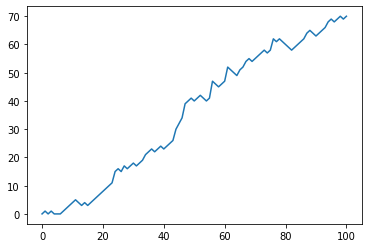

In [6]:
# Visualize the walk 
import matplotlib.pyplot as plt

# Plot random walk
# If you pass only one argument, Python will know what to do and will use the index 
## of the list to map onto the x axis, and the values in the list onto the y axis
plt.plot(random_walk)
plt.show()

Question: What is the chance that you reach 60 steps high?
Each random walk ends at a different step, if you simulate this walk thousands of times, you'll end up with thousands of final steps. This is a distribution of final steps. Once you know the distribution, you can 

In [10]:
# Initialize all_walks
all_walks = []

for i in range(500):
    # Code from before
    random_walk = [0]

    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            # Use max to make sure step can't go below 0
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        
        if np.random.rand() <= 0.001:
            step = 0 

        random_walk.append(step)
    # Append random_walk to all_walks
    all_walks.append(random_walk)

print(all_walks)


[[0, 0, 2, 3, 4, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 7, 8, 7, 8, 9, 8, 7, 6, 11, 12, 11, 10, 12, 15, 14, 15, 16, 17, 16, 17, 16, 17, 18, 19, 18, 17, 16, 17, 18, 19, 20, 21, 26, 25, 24, 25, 24, 25, 26, 32, 33, 38, 37, 42, 43, 42, 41, 40, 42, 43, 44, 46, 45, 46, 47, 46, 48, 49, 50, 51, 52, 51, 50, 51, 53, 54, 57, 58, 57, 58, 64, 65, 64, 65, 66, 67, 68, 69, 72, 73], [0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 3, 2, 3, 8, 9, 10, 11, 12, 16, 17, 18, 19, 18, 17, 18, 19, 20, 21, 20, 21, 22, 21, 20, 21, 22, 21, 26, 25, 26, 28, 27, 28, 29, 30, 31, 32, 31, 30, 29, 30, 31, 36, 35, 36, 37, 42, 41, 40, 41, 42, 43, 42, 43, 44, 45, 44, 45, 51, 50, 52, 53, 54, 55, 58, 57, 58, 59, 62, 63, 65, 64, 70, 76, 77, 76, 75, 76, 75, 74, 75, 74, 75, 76, 77, 83, 87, 86, 85, 88], [0, 1, 7, 8, 9, 8, 13, 12, 13, 12, 11, 12, 11, 10, 9, 8, 7, 8, 9, 10, 11, 10, 9, 8, 12, 13, 14, 15, 16, 19, 23, 24, 25, 24, 23, 22, 23, 24, 25, 24, 29, 30, 31, 30, 29, 30, 29, 30, 31, 32, 31, 32, 33, 32, 36, 35, 36, 38, 39, 38, 37, 4

`all_walks` is a list of lists: every sub_list represeta a single random walk. We need to convert this into a NumPy array to then visualize.

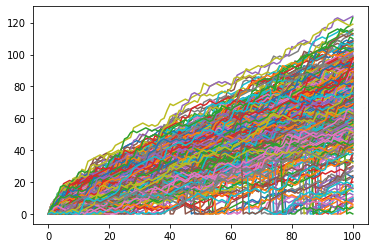

In [11]:
# Convert all_walks to NumPy array: np_aw
np_aw = np.array(all_walks)

# Transpose np_aw so that every row in np_aw represents the position after 1 throw for the 10 random walks
np_aw_t = np.transpose(np_aw)
# Plot np_aw and show
plt.plot(np_aw_t)
plt.show()


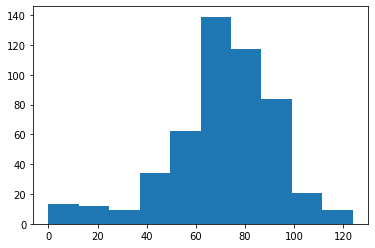

In [12]:
# From np_aw_t select the last row corresponding at the final step you reached after 500 walks 
ends = np_aw_t[-1, :]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in `ends` that are greater than or equal to 60 and divide by the total number of simulations. 

In [23]:
# Number of ends that are higher or equal to 60
higher = sum(ends >= 60)
print(higher)
# Probability that is higher than 60
p = higher/500
print(p)

# ALTERNATIVE: it is the mean of the array of 1 and 0 
np.mean(ends>=60)

387
0.774


0.774